# BIOS512 Assignment #2

📚 Import the `tidyverse` and the `palmerpenguins` packages. (**Hint:** use the `library` function)

In [1]:
library('tidyverse')
library('palmerpenguins')
library('scales')
penguins |> head()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘palmerpenguins’ was built under R version 4.1.3”

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


Use `geom_bar` to make a histogram of penguin counts by `year`.

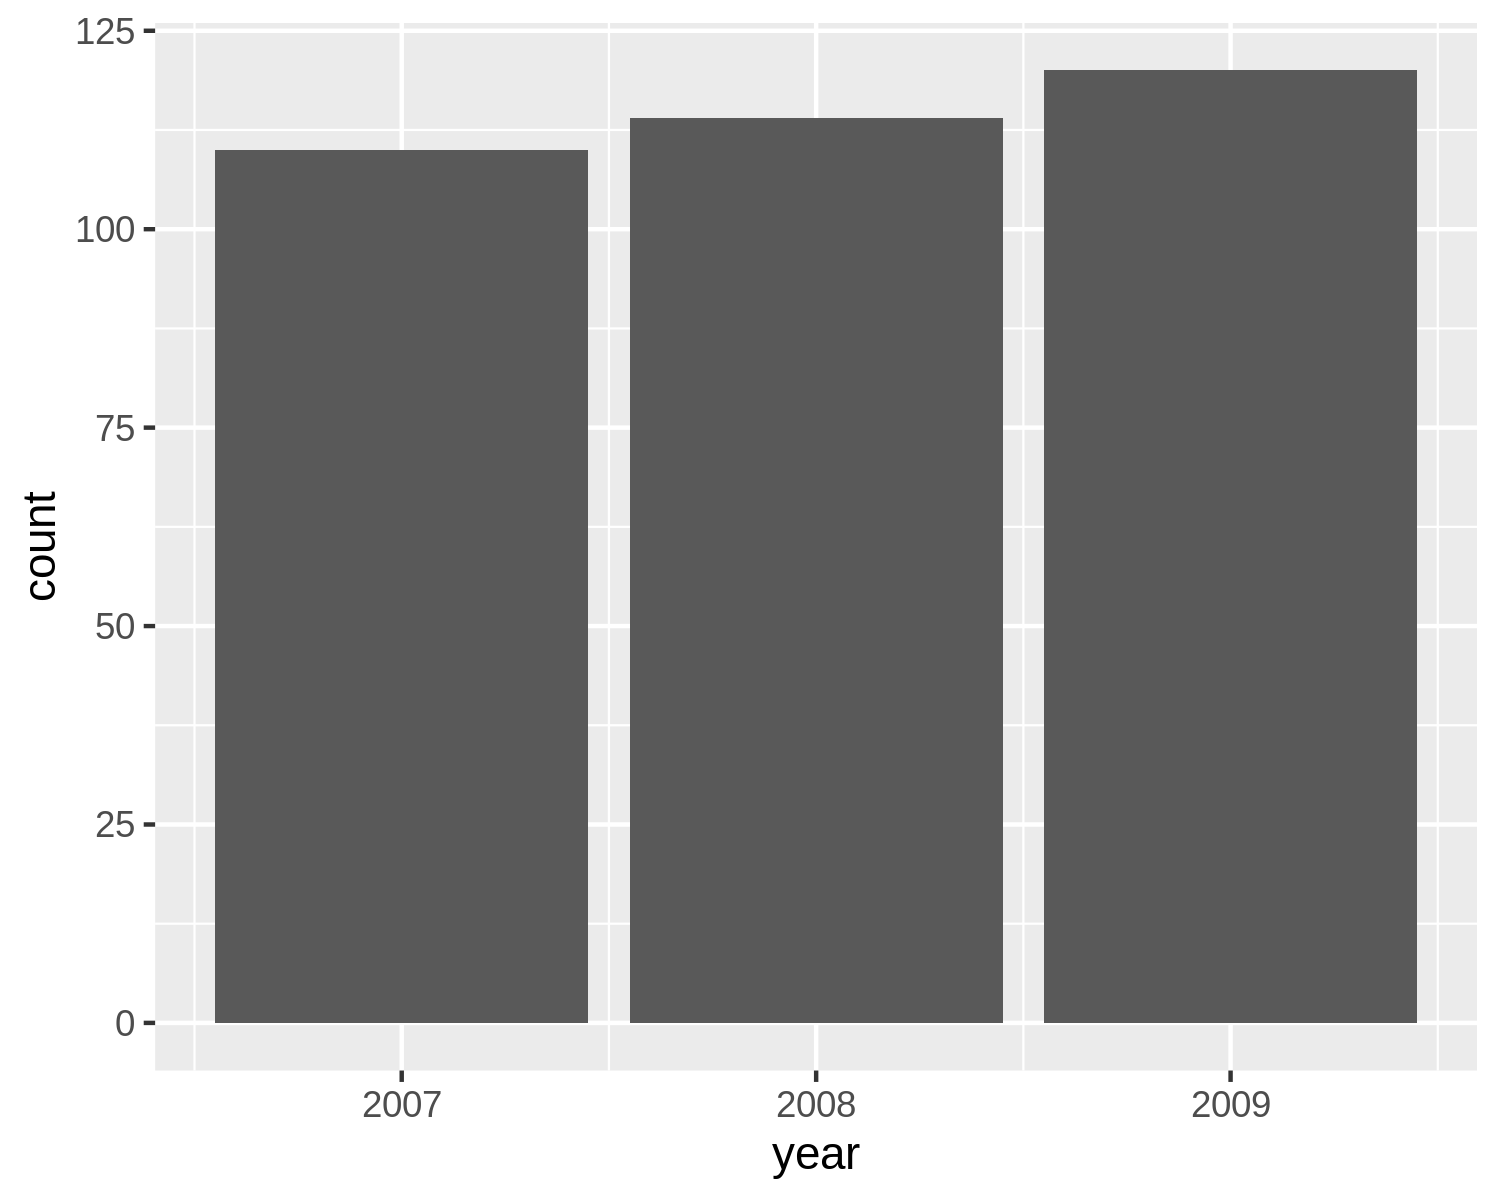

In [2]:
p = ggplot(penguins, aes(y = year)) +
    geom_bar() + 
    coord_flip()
p 

Make a histogram or KDE plot that shows the distribution of body mass in each year. *Use a different theme than the default.*

Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


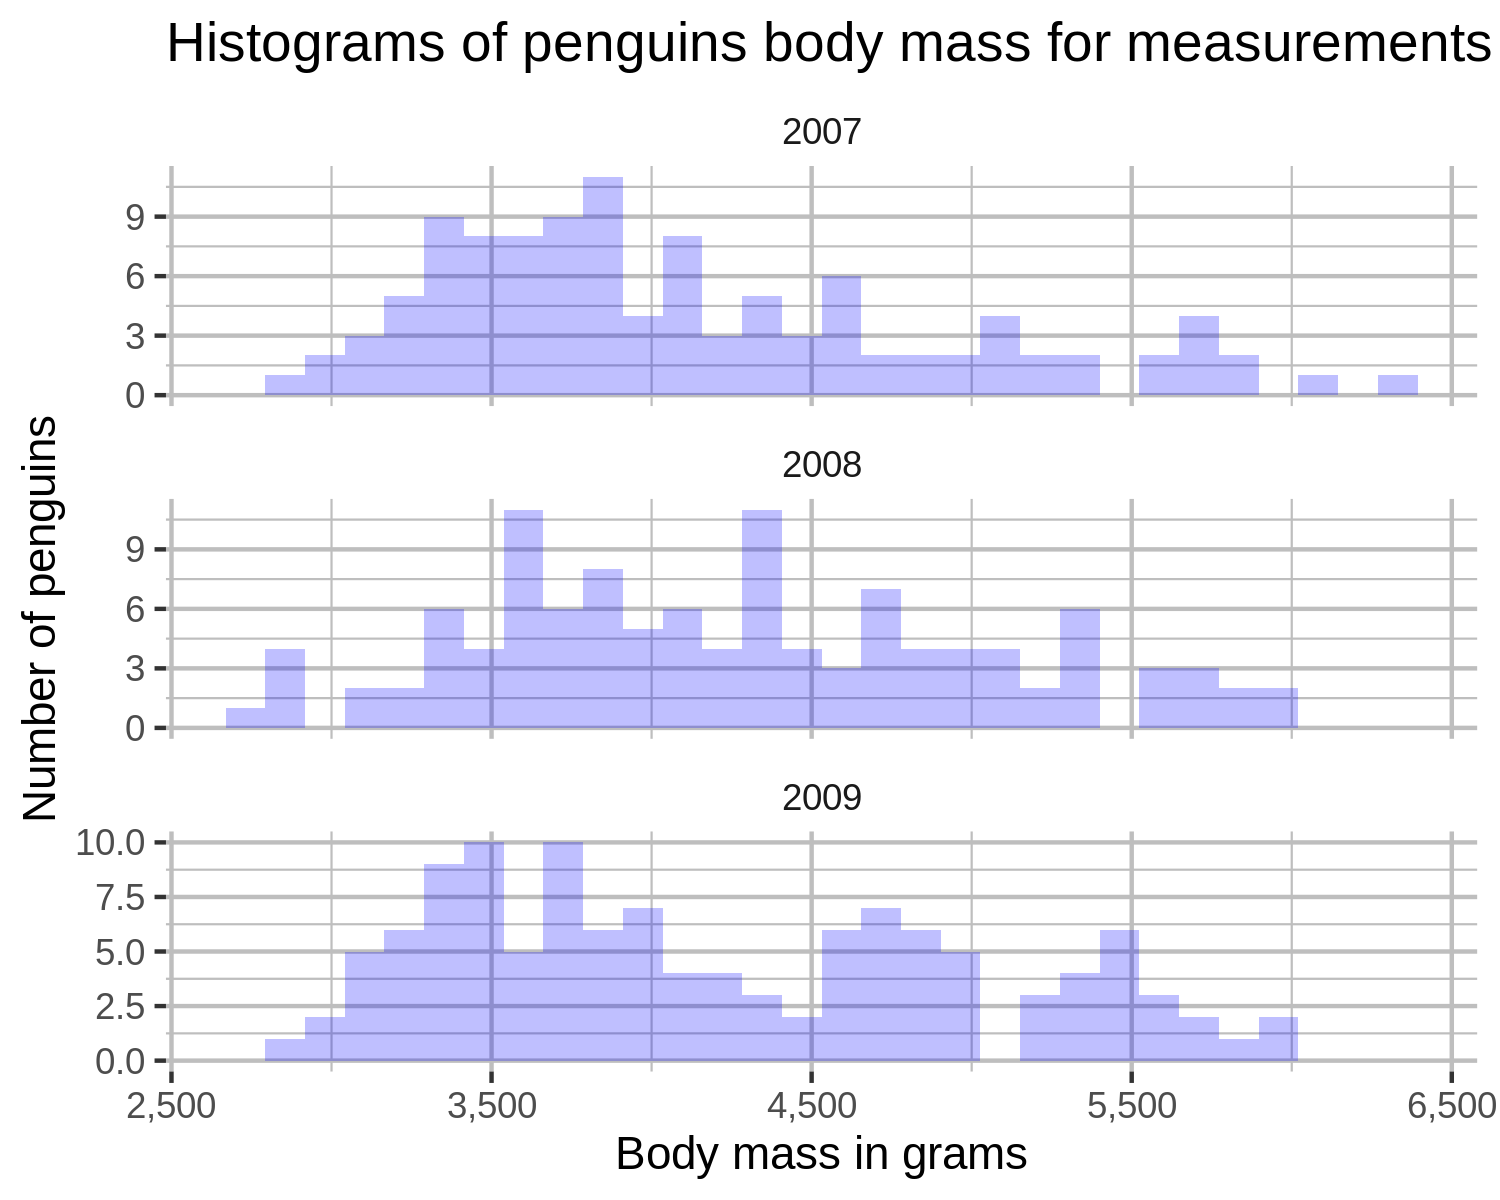

In [3]:
p = ggplot(penguins, aes(x = body_mass_g)) + 
    geom_histogram(fill = 'blue', alpha = 0.25, bins = 30) + 
    facet_wrap(~year, ncol = 1, scales ='free_y') + 
    theme(plot.background = element_rect(fill = 'NA'),
         panel.background = element_rect(fill = 'NA'), 
         panel.grid.major = element_line(color = 'grey'), 
         panel.grid.minor = element_line(color = 'grey')) + 
    theme(strip.background = element_rect(colour = "NA", fill = "white")) +
    theme(strip.placement = "right") + 
    labs(title = 'Histograms of penguins body mass for measurements taken between 2007 - 2009') + 
    labs(y= "Number of penguins", x = "Body mass in grams") + 
    scale_x_continuous(label = comma)
p

🎉**BONUS**: can you adjust the `x-axis` labels to have "comma" formatting? (**Hint:** use the `comma_format()` function from the `scales` package.)

👇 Here is the chart I made for reference.

<img src="https://github.com/chuckpr/BIOS512/blob/main/assignments/mass_histograms3.png?raw=true" style="width:700px" />

Is there a difference between the body mass of male and female penguins? Use a scatter plot with jitter to compare the masses of male and female penguins. **Facet by `species` to compare within each species-group.**

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007
Adelie,Torgersen,38.9,17.8,181,3625,female,2007


Warning message:
“Removed 2 rows containing non-finite values (stat_bin).”


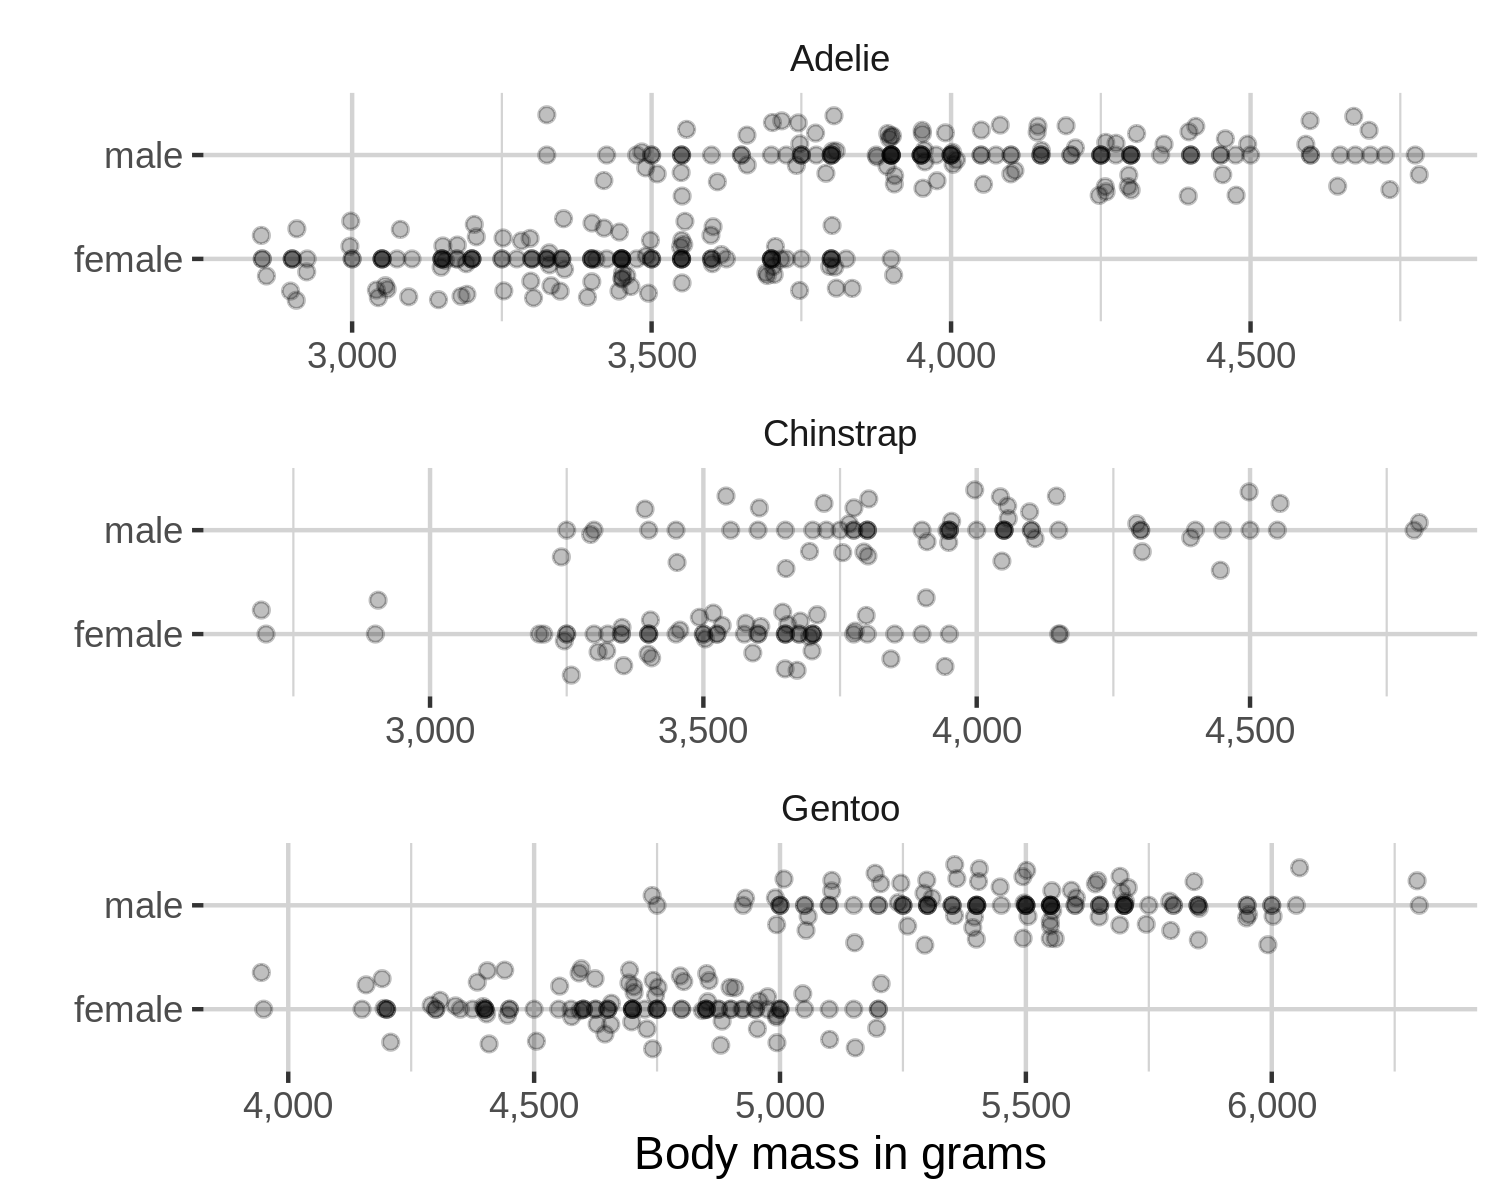

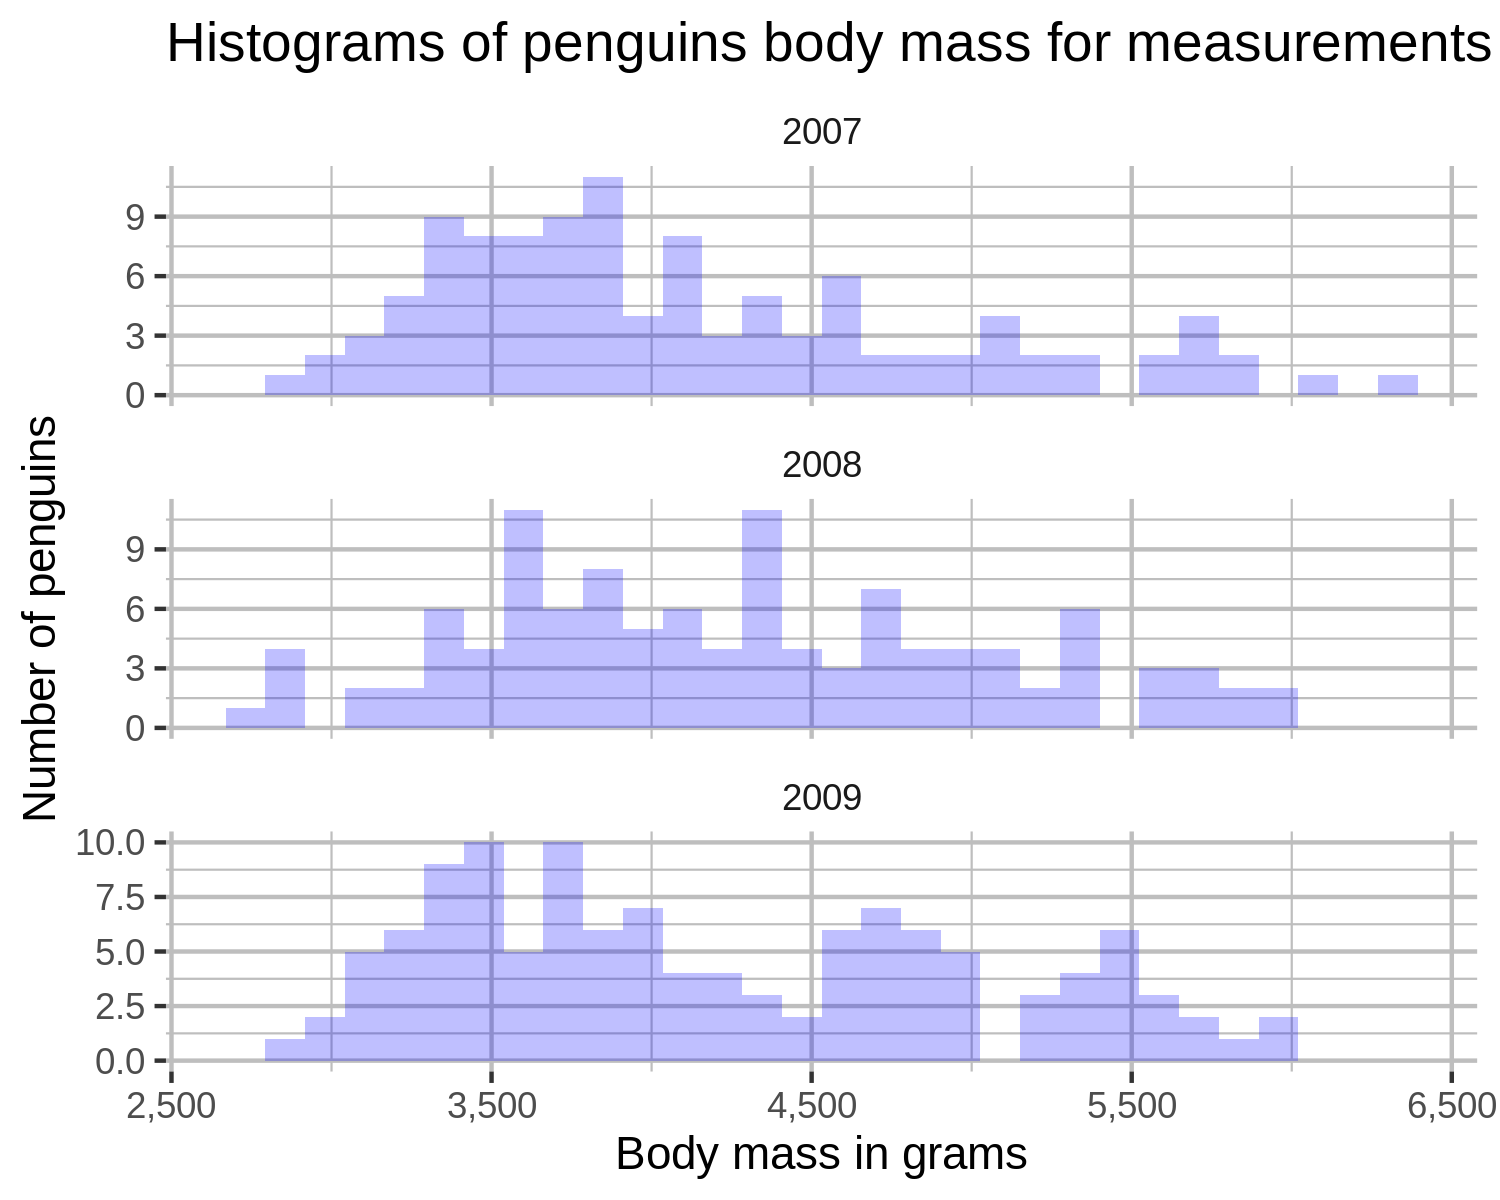

In [10]:
# filter out NA responses from sex category
penguins_filter = penguins |> filter(sex!='NA') 
penguins_filter |> head()

ggplot(penguins_filter, aes(x = body_mass_g, y = sex)) + 
    geom_point(fill = 'grey', alpha = 0.25) + 
    geom_jitter(fill = 'grey', alpha = 0.25) + 
    facet_wrap(~species, ncol = 1, scales ='free_x') + 
    theme(plot.background = element_rect(fill = 'NA'),
         panel.background = element_rect(fill = 'NA'), 
         panel.grid.major = element_line(color = 'light grey'), 
         panel.grid.minor = element_line(color = 'light grey')) + 
    labs(y= "", x = "Body mass in grams") +
    scale_x_continuous(label = comma) + 
    theme(strip.background = element_rect(colour = "NA", fill = "white")) +
    theme(strip.placement = "right") 
p


👇 Here is my solution for reference. 

<img src="https://github.com/chuckpr/BIOS512/blob/main/assignments/sex_differences_in_body_mass_within_species.png?raw=true" style="width: 600px" />